In [25]:
import pandas as pd
import seaborn as sns


In [5]:
### Read the file
car_data = pd.read_csv("data/car data.csv",sep=",")

In [6]:
print("Data contains {0} rows and {1} columns".format(car_data.shape[0],car_data.shape[1]))

Data contains 301 rows and 9 columns


In [15]:
## checking NA record count
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
## Summary of data
car_data.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [20]:
## Checking data types of car
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [22]:
## checking top 10 records to understand
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [23]:
## number of years since car bought
car_data['Current_Year'] = 2021
car_data['No_of_years'] = car_data['Current_Year'] - car_data['Year']

## Drop the columns 
car_data.drop(['Year','Current_Year'],axis=1,inplace=True)

In [24]:
car_data.head(3)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4


In [26]:
## Correlation data
car_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000


<AxesSubplot:>

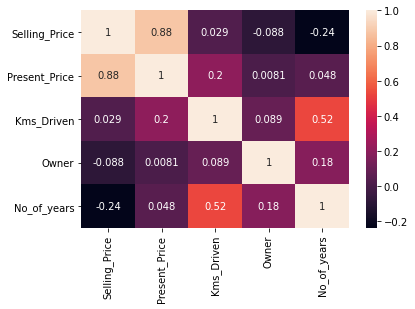

In [29]:
corr_data = car_data.corr()

sns.heatmap(corr_data,annot= True)

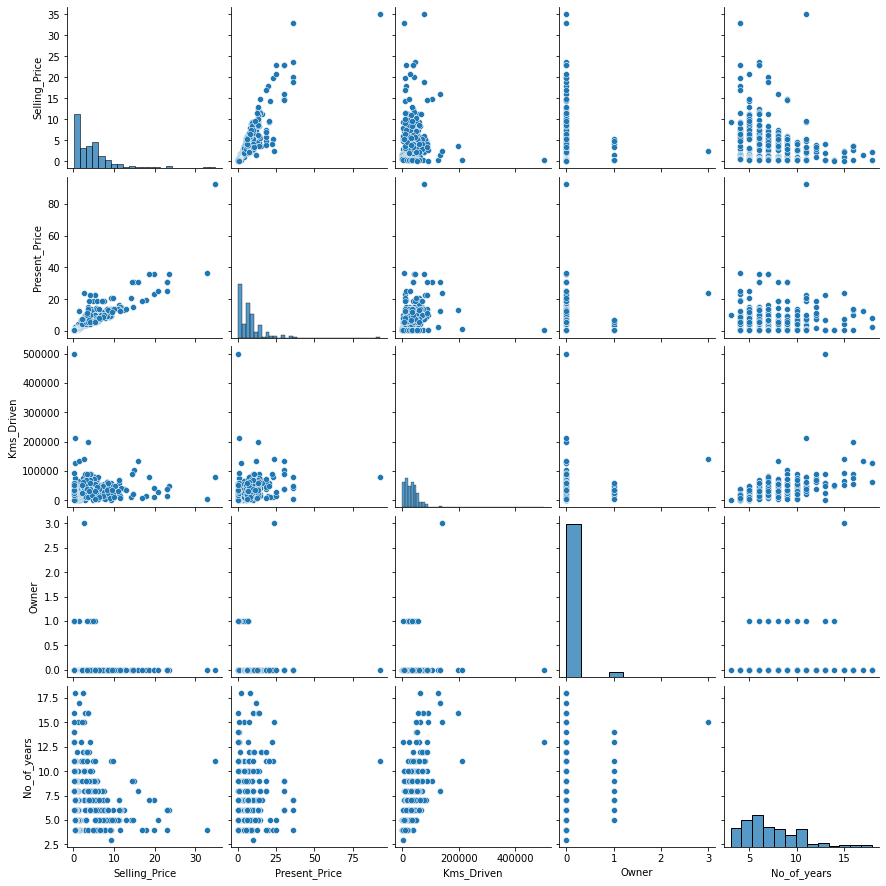

In [30]:
## pairplot
sns.pairplot(car_data)

In [32]:
## Dummify the data
final_data = pd.get_dummies(car_data)

In [33]:
final_data.head(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [35]:
## creating dependent and independent variables
X = final_data.iloc[:,1:]
Y = final_data.iloc[:,0]